### **Week-6:** MULTI-ARMED BANDITS –AD OPTIMIZATION
### **Name:** Atyam V V R Manoj
### **Reg No. | Sec :** 200968108 | DSE-A 27

#### **Problem:**
Consider the given dataset “Ads_clicks” containing data about which add was clicked in each time step. Suppose an advertising company is running 10 different ads targeted towards a similar set of the population on a webpage. We have results for which ads were clicked by a user Each column index represents a different ad. We have a 1 if the ad was clicked by a user, and 0 if it was not.

**Importing required libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Importing dataset
df = pd.read_csv('Ads_Optimisation.csv')

# displaying top 5 rows
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
# displaying info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [ ]:
# checking the size of dataset
print("Size of dataset: ",df.shape)

# changing the size to given number of time steps
df = df[0:2000]
print("Size after slicing: ",df.shape)

Size of dataset:  (10000, 10)
Size after slicing:  (2000, 10)


#### **A. Write down the MAB agent problem formulation in your own words**
Based on the given problem statement, we can understand the goal of the advertising company is to maximise revenue from displaying ads. So we can define a MAB agent whose goal is to try to maximize the total no. of clicks on a particular ad**(total rewards)** by selecting which ad to display at each time step based on given past Ad-clicks data. 

* As each Ad has an unknown distribution of rewards(no. of clicks), the challenge for the MAB agent is to balance exploration (trying out different ads to gather more information) and exploitation (selecting the ad that is most likely to be clicked based on the current knowledge) to maximize the total no. of Ad-clicks over time. The problem formulation involves selecting an appropriate MAB algorithm that can balance exploration and exploitation effectively and can adapt to the changing ad-click patterns over time.
 
* The MAB agent must balance this trade-off to efficiently maximize its cumulative reward while minimizing regret (the difference between the total reward obtained and the maximum possible reward).

#### **B. Compute the total rewards after 2000-time steps using the ε-greedy action for:** 
a) ε=0.01

b) ε= 0.3

In [ ]:
'''
    Using the epsilon-greedy approach for computing total_rewards.
'''
num_ads = 10 # total no. of ads in given data
num_rounds = 2000 # given time-steps

ads_selected = []
total_rewards = 0
num_selections = np.zeros(num_ads)
sum_rewards = np.zeros(num_ads)

# using a loop for computing using both epsilon values
epsilons = [0.01, 0.3]

for eps in epsilons:
  print("\nComputing rewards using epsilon = ",eps,"\n")
  for n in range(num_rounds):

    # if random value is greater than epsilon, select ad with highest estimate value
    if np.random.random() > eps:   
      ad = np.argmax(sum_rewards / (num_selections + 1))    
    else:
      # else select random ad
      ad = np.random.randint(num_ads)     # random selection
    
    # calculating reward for selected ad based on given dataset
    ads_selected.append(ad)
    reward = df.values[n, ad]
    total_rewards += reward
    num_selections[ad] += 1
    sum_rewards[ad] += reward
    if n % 100 == 0:
      print(f"Selected ad for round {n}: {ad} (Epsilon={eps})")

  print(f"\nTotal reward for epsilon={eps}: {total_rewards}")
  print("------------------------------------------------------------------")




Computing rewards using epsilon =  0.01 

Selected ad for round 0: 0 (Epsilon=0.01)
Selected ad for round 100: 0 (Epsilon=0.01)
Selected ad for round 200: 0 (Epsilon=0.01)
Selected ad for round 300: 0 (Epsilon=0.01)
Selected ad for round 400: 0 (Epsilon=0.01)
Selected ad for round 500: 0 (Epsilon=0.01)
Selected ad for round 600: 0 (Epsilon=0.01)
Selected ad for round 700: 0 (Epsilon=0.01)
Selected ad for round 800: 0 (Epsilon=0.01)
Selected ad for round 900: 0 (Epsilon=0.01)
Selected ad for round 1000: 0 (Epsilon=0.01)
Selected ad for round 1100: 0 (Epsilon=0.01)
Selected ad for round 1200: 0 (Epsilon=0.01)
Selected ad for round 1300: 0 (Epsilon=0.01)
Selected ad for round 1400: 0 (Epsilon=0.01)
Selected ad for round 1500: 0 (Epsilon=0.01)
Selected ad for round 1600: 0 (Epsilon=0.01)
Selected ad for round 1700: 0 (Epsilon=0.01)
Selected ad for round 1800: 0 (Epsilon=0.01)
Selected ad for round 1900: 0 (Epsilon=0.01)

Total reward for epsilon=0.01: 341
---------------------------------

#### **C. Compute the total rewards after 2000-time steps using the Upper-Confidence-Bound action method for c= 1.5**
(UCB is the most widely used solution method for multi-armed bandit problems. This algorithm is based on the principle of optimism in the face of uncertainty.
In other words, the more uncertain we are about an arm, the more important it becomes to explore that arm.

UCB says that we should choose an Ad 1 and receive a reward making us less uncertain about its action-value. For the timestep, if we still are very uncertain about Ad 1, we will choose it again until the uncertainty is reduced below a threshold.)

In [ ]:
'''
    Using the UCB action method to compute the rewards
'''
num_ads = 10 # total no. of ads in given data
num_rounds = 2000 # total time-steps

ads_selected = []
total_rewards = 0
num_selections = np.zeros(num_ads)
sum_rewards = np.zeros(num_ads)

# given exploration parameter c
c = 1.5

for n in range(num_rounds):
    # select ad using UCB action method
    ad = 0
    max_upper_bound = 0
    for i in range(num_ads):
        if num_selections[i] > 0:
            average_reward = sum_rewards[i] / num_selections[i]
            delta_i = np.sqrt(2 * np.log(n+1) / num_selections[i])
            upper_bound = average_reward + c * delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)

    reward = df.values[n, ad]
    total_rewards += reward
    num_selections[ad] += 1
    sum_rewards[ad] += reward
    

print(f"Total reward for c={c}: {total_rewards}")
print("\nAds selected by UCB method:")
print(ads_selected)

Total reward for c=1.5: 290

Ads selected by UCB method:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 4, 0, 1, 2, 3, 5, 6, 7, 8, 9, 4, 0, 4, 4, 1, 2, 3, 5, 6, 7, 8, 9, 7, 0, 4, 7, 1, 2, 3, 5, 6, 8, 9, 0, 4, 0, 7, 4, 1, 2, 3, 5, 6, 8, 9, 4, 0, 7, 1, 2, 3, 5, 6, 8, 9, 4, 0, 7, 7, 7, 1, 2, 3, 5, 6, 8, 8, 9, 4, 4, 7, 0, 0, 8, 1, 1, 2, 3, 5, 6, 9, 4, 0, 7, 1, 8, 8, 2, 3, 5, 6, 9, 4, 0, 0, 7, 8, 1, 0, 4, 4, 2, 3, 5, 6, 9, 7, 8, 4, 1, 1, 0, 7, 2, 3, 5, 6, 9, 1, 1, 8, 4, 0, 1, 1, 1, 7, 2, 2, 3, 5, 6, 9, 8, 1, 4, 0, 2, 7, 1, 4, 3, 5, 6, 9, 8, 0, 2, 7, 1, 4, 8, 3, 5, 6, 9, 0, 2, 7, 7, 1, 4, 8, 0, 7, 3, 5, 5, 6, 9, 2, 5, 1, 4, 0, 8, 7, 7, 3, 6, 9, 1, 4, 7, 2, 5, 0, 8, 3, 6, 6, 9, 1, 4, 7, 2, 5, 6, 0, 8, 1, 4, 7, 7, 3, 9, 2, 5, 6, 7, 0, 8, 1, 4, 3, 9, 7, 7, 2, 5, 6, 0, 8, 7, 1, 4, 3, 9, 0, 0, 2, 5, 6, 6, 7, 6, 8, 0, 1, 4, 3, 9, 7, 2, 5, 0, 1, 4, 6, 8, 7, 3, 9, 2, 5, 0, 1, 4, 6, 6, 8, 6, 6, 6, 7, 3, 9, 0, 1, 4, 2, 5, 8, 7, 7, 6, 7, 0, 1, 4, 3, 9, 2, 

Text(0, 0.5, 'Number of times each ad was clicked')

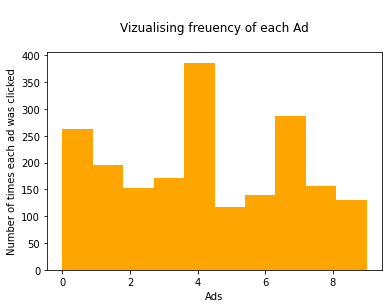

In [ ]:
# Visualising the results

plt.hist(ads_selected, color = 'orange')
plt.title('\nVizualising freuency of each Ad\n')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was clicked')

#### **D. For all approaches, explain how the action value estimated compares to the optimal action.**

In **Epsilon-greedy action** method, we select a 
- ***random action*** with probability ***epsilon***(given value) and 
-  ***action with highest estimated value*** with probability ***(1 - epsilon)***.

B.a) When **epsilon = 0.01**, it means that the agent selects the action with the highest estimated value with 99% probability. Hence, the action value estimated will be very close to the optimal action value.

B.b) When epsilon = 0.3, it means that the agent will explore more often by selecting a random action with probability 0.3. With this approach, the action value estimated may not be as close to the optimal action value as compared to the above approach because the algorithm is more likely to select a sub-optimal action.

C. When using the **Upper Confidence bound action method with c = 1.5**, the agent selects the action with the highest UCB value, which balances exploration and exploitation. The value of c determines the extent of exploration. As the value of c is relatively high (1.5), the agent is more likely to explore suboptimal actions. Therefore, the action value estimated may not be as close to the optimal action value as in Approach B.a.

## **Conclusion:**
Approach **B.a** is expected to have the estimated action value closest to the optimal action value, while the other two approaches may have a larger difference from the optimal action value due to their higher tendency to explore suboptimal actions.